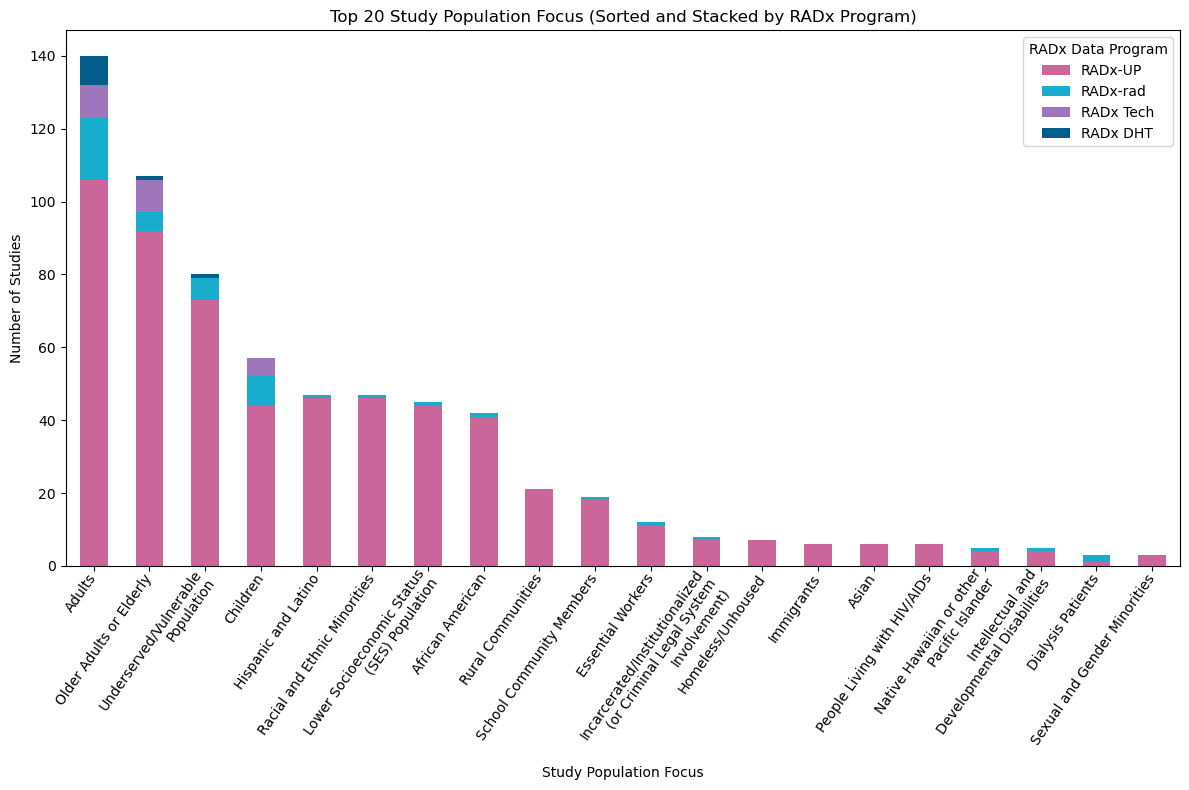

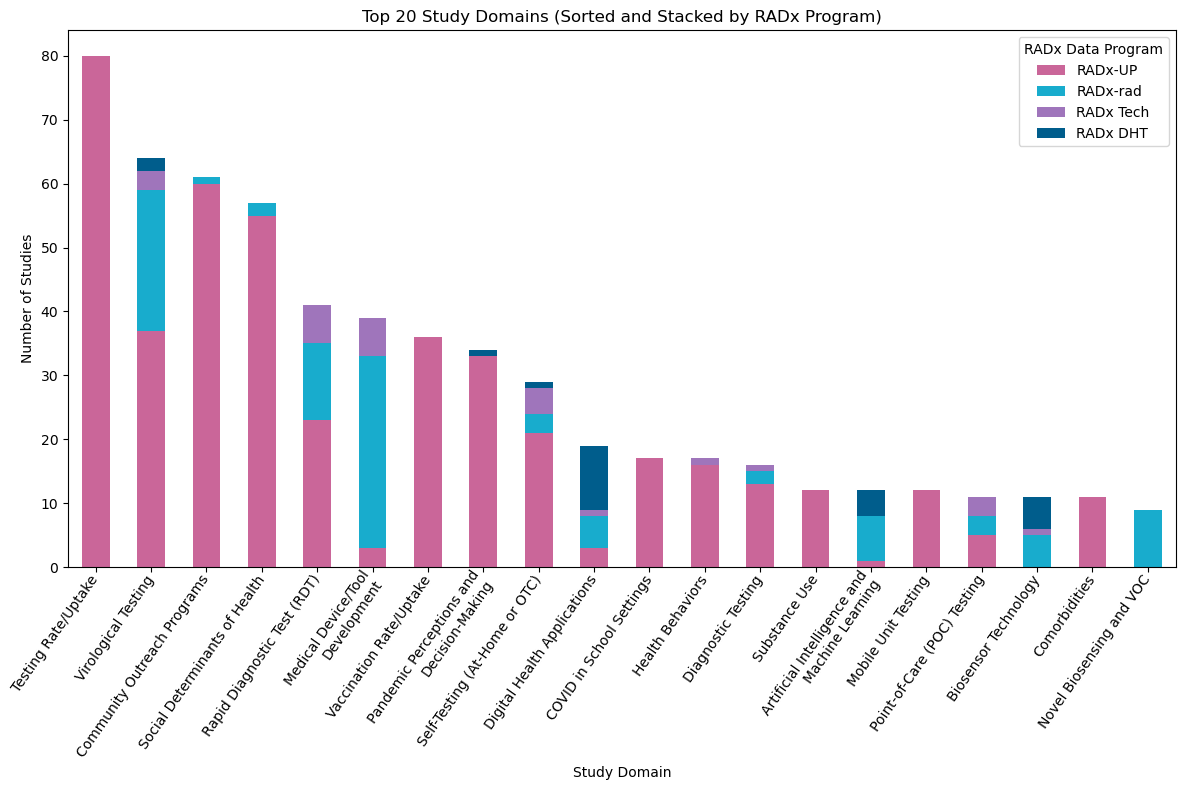

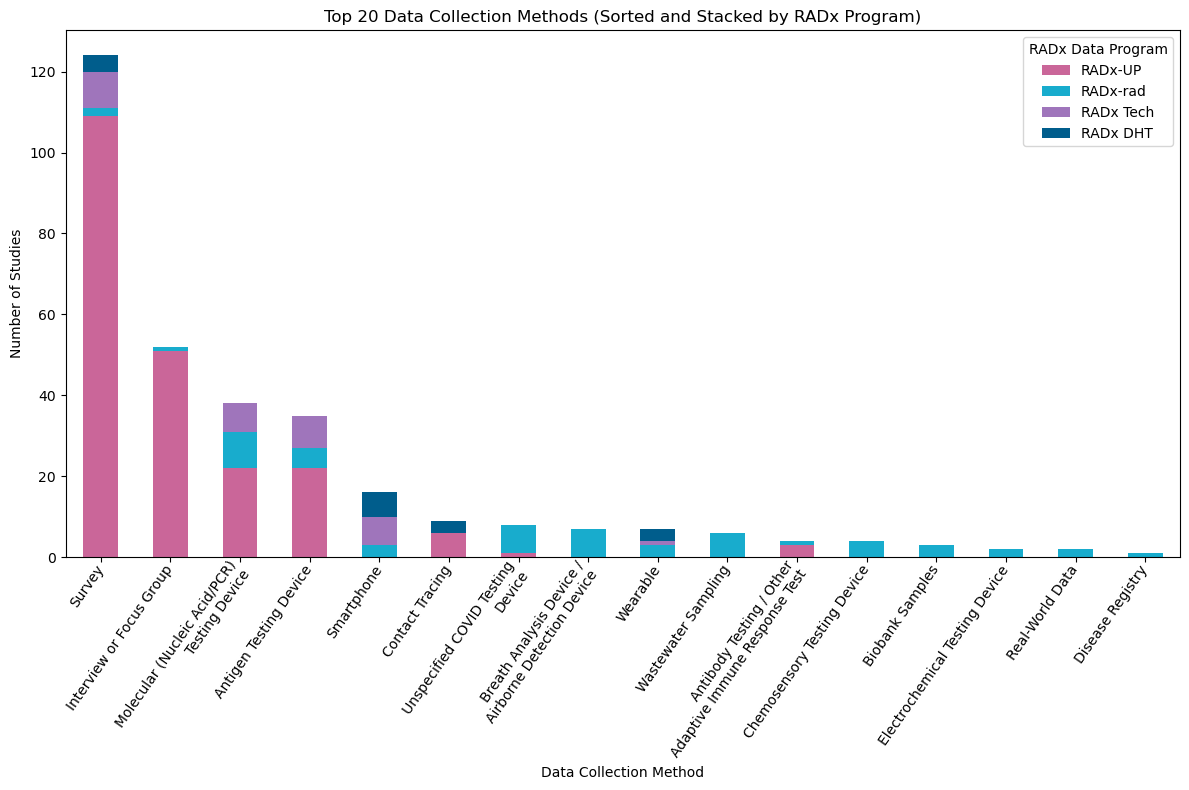

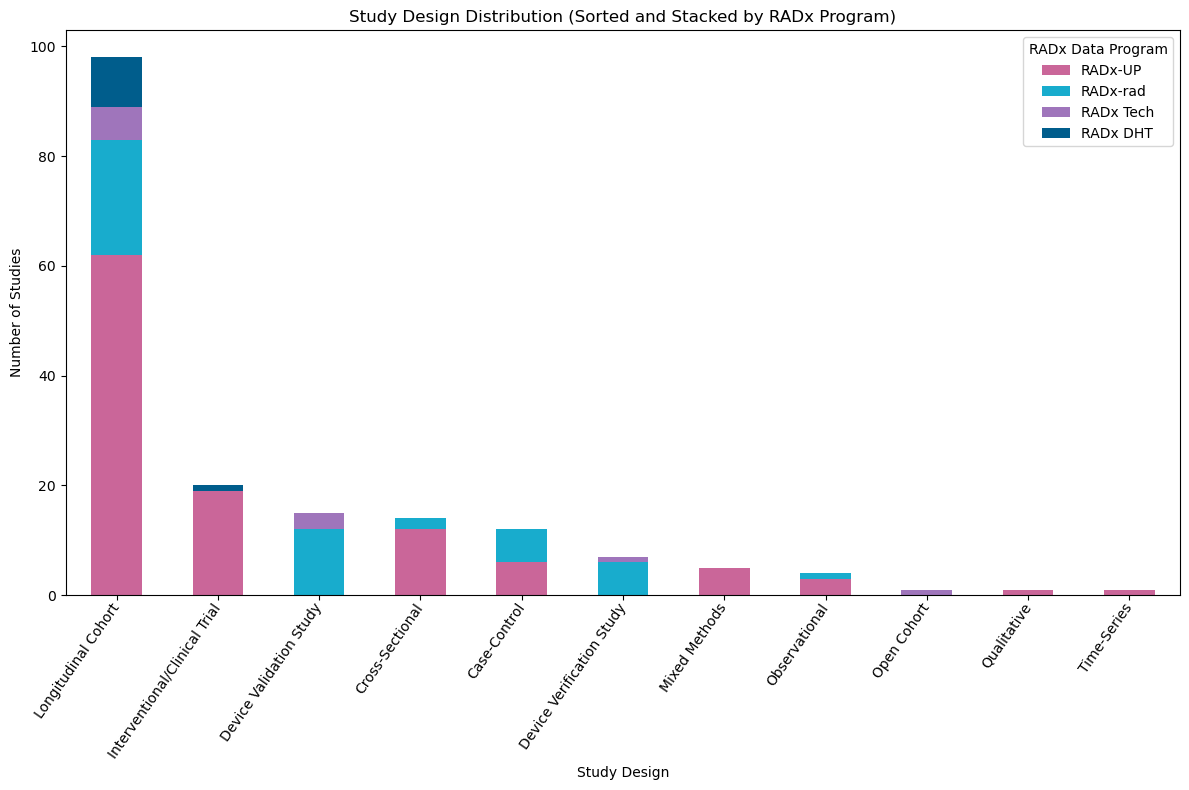

In [19]:
# Re-import libraries and re-load the data to ensure all required data structures are defined
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file with appropriate encoding
file_path = 'StudyExplorerResults.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Process the data
data['Study Population Focus'] = data['Study Population Focus'].str.split('; ')
data['Study Domain'] = data['Study Domain'].str.split('; ')
data['Data Collection Method'] = data['Data Collection Method'].str.split('; ')

# Explode columns to have one value per row for analysis
exploded_population_focus = data.explode('Study Population Focus')
exploded_study_domain = data.explode('Study Domain')
exploded_data_collection = data.explode('Data Collection Method')

# Count occurrences for each category in each field
top_population_focus = exploded_population_focus['Study Population Focus'].value_counts().head(20)
top_study_domain = exploded_study_domain['Study Domain'].value_counts().head(20)
top_data_collection = exploded_data_collection['Data Collection Method'].value_counts().head(20)

# Function to sort data and reorder bars for better visualization
def sort_stacked_data(data):
    # Order columns within bars (stacked order) by decreasing count of studies
    ordered_columns = data.sum().sort_values(ascending=False).index
    data = data[ordered_columns]

    # Order bars (categories) by total studies and set index accordingly
    data = data.loc[data.sum(axis=1).sort_values(ascending=False).index]

    return data

# Apply sorting to all datasets
sorted_population_focus = sort_stacked_data(stacked_population_focus)
sorted_study_domain = sort_stacked_data(stacked_study_domain)
sorted_data_collection = sort_stacked_data(stacked_data_collection)
sorted_study_design = sort_stacked_data(stacked_study_design)

# Define colors for RADx programs (these should align with RADx Data Hub's visual identity)
radx_colors = {
    "RADx Tech": "#9f75bb", 
    "RADx-UP": "#ca6699",   
    "RADx-rad": "#18accd",   
    "RADx DHT": "#005d8c",   
}

def wrap_labels_no_break(labels, max_length=40):
    wrapped_labels = []
    for label in labels:
        if len(label) > max_length:
            words = label.split(' ')
            wrapped_label = ''
            line = ''
            for word in words:
                if len(line) + len(word) + 1 <= max_length:
                    line += (word + ' ')
                else:
                    wrapped_label += line.strip() + '\n'
                    line = word + ' '
            wrapped_label += line.strip()
            wrapped_labels.append(wrapped_label)
        else:
            wrapped_labels.append(label)
    return wrapped_labels

def plot_stacked_bar_with_correct_alignment(data, title, xlabel, ylabel, colors=None, max_label_length=30):
    ax = data.plot(kind="bar", stacked=True, figsize=(12, 8), color=colors)
    wrapped_labels = wrap_labels_no_break(data.index, max_label_length)
    ax.set_xticks(range(len(wrapped_labels)))
    ax.set_xticklabels(wrapped_labels, rotation=55, ha='right', rotation_mode='anchor', va='center')  # Adjust rotation and vertical alignment
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title="RADx Data Program")
    plt.tight_layout()
    plt.show()

plot_stacked_bar_with_correct_alignment(
    sorted_population_focus,
    title="Top 20 Study Population Focus (Sorted and Stacked by RADx Program)",
    xlabel="Study Population Focus",
    ylabel="Number of Studies",
    colors=radx_colors
)

plot_stacked_bar_with_correct_alignment(
    sorted_study_domain,
    title="Top 20 Study Domains (Sorted and Stacked by RADx Program)",
    xlabel="Study Domain",
    ylabel="Number of Studies",
    colors=radx_colors
)

plot_stacked_bar_with_correct_alignment(
    sorted_data_collection,
    title="Top 20 Data Collection Methods (Sorted and Stacked by RADx Program)",
    xlabel="Data Collection Method",
    ylabel="Number of Studies",
    colors=radx_colors
)

plot_stacked_bar_with_correct_alignment(
    sorted_study_design,
    title="Study Design Distribution (Sorted and Stacked by RADx Program)",
    xlabel="Study Design",
    ylabel="Number of Studies",
    colors=radx_colors
)